### World Bank dataset analysis: BRICS country indicators

Brics was a concept created in 2001 by an economic from Goldaman Sachs to explain the emergents countries. Composed by China, Brazil, Russia and India, and after was added South Africa, the economic was trying to explain the potential economies that was growing fast that days. After select the dataset I created a new dataset with just China and check the raw data to select the indicators that are relevant and that was not empty.


Using pandas and matplotlib, was selected 26 indicators from more than 1,400 that have relevant data to understand the evolution of this countries in the past 20 years. 

Was selected 26 indicators and 20 years of analysis from 5 Countries.
To also have more backup of the data I did the cleanning step by step creating more than one csv file.
<b>To be sure that I will use relevant data for each country I transform the original dataset, into 5 different csv file for each country. </b>


### Step 1: <span style="color:green">Import Libraries</span> 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



### Step 2: <span style="color:green">Import the World Bank Dataset and cleanning</span> 
Look for the data that want to analyse after the cleanning

In [2]:
df = pd.read_csv('../../../../Downloads/WDIData.csv')

brics_country_code = ["BRA", "RUS", "ZAF", "CHI", "IND"]

df_caps = df[df["Country Code"].isin(["BRA", "RUS", "ZAF", "CHN", "IND"])]

df_caps = df_caps[["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]]

df_caps.to_csv('df_brics.csv', sep=';', encoding='utf-8')
print(df_caps.info())
print(df_caps.head(10))
df_caps.fillna(0)
df_indicator = df_caps.groupby("Indicator Code")["Indicator Name"]

df_chn = df_caps[df_caps["Country Code"] == "CHN"]
ch_ind = df_chn["Indicator Name"].unique()

print('china ', len(ch_ind))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7215 entries, 108225 to 327560
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7215 non-null   object 
 1   Country Code    7215 non-null   object 
 2   Indicator Name  7215 non-null   object 
 3   Indicator Code  7215 non-null   object 
 4   2000            4540 non-null   float64
 5   2001            4419 non-null   float64
 6   2002            4564 non-null   float64
 7   2003            4474 non-null   float64
 8   2004            4533 non-null   float64
 9   2005            4692 non-null   float64
 10  2006            4603 non-null   float64
 11  2007            4810 non-null   float64
 12  2008            4724 non-null   float64
 13  2009            4746 non-null   float64
 14  2010            4962 non-null   float64
 15  2011            4917 non-null   float64
 16  2012            4951 non-null   float64
 17  2013            4892 non-n

### Step 3: <span style="color:green">Tranformation of the dataset for a data to analyse</span> 

Steps followed:

<li> After the step 2 that was analised using excel, was created csv with 26 indicator with interisting to analyse </li>
<li> Defined the columns to be used in the analysis</li>
<li> Drop the index column</li>
<li> Melt the Years for one column: Year</li>
<li> Pivot table to get the Indicators to analyse and put them in separeted columns</li>
<li> Split the dataset cleaned by the 5 countries for individual and group analysis</li>



In [3]:
indicator_selected = pd.read_csv("./column_selected.csv")

df = df[df["Indicator Name"].isin(indicator_selected)]

indicators = df["Indicator Name"]
# print(indicators)

df_cleaned = df[["Country Name", "Country Code", "Indicator Name", "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]]
# print(df_cleaned.info())

df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('^Unnamed')]
df_transf = df_cleaned.melt(id_vars=["Country Name", "Country Code", "Indicator Name"], var_name="Year", value_name="Value")

df_ready = df_transf.pivot_table("Value", ["Country Name", "Country Code", "Year"], "Indicator Name").reset_index()

df_ready.to_csv('prepared_data.csv')
# print(df.head(5))
# print(df_transf.head(5))
print('df_ready: ', df_ready.head(5))
print('df_ready: ', df_ready.info())

df_chn = df_ready[df_ready["Country Code"] == "CHN"]
df_bra = df_ready[df_ready["Country Code"] == "BRA"]
df_ind = df_ready[df_ready["Country Code"] == "IND"]
df_rus = df_ready[df_ready["Country Code"] == "RUS"]
df_zaf = df_ready[df_ready["Country Code"] == "ZAF"]

df_chn.to_csv('chn_data.csv')
df_bra.to_csv('bra_data.csv')
df_ind.to_csv('ind_data.csv')
df_rus.to_csv('rus_data.csv')
df_zaf.to_csv('zaf_data.csv')


df_ready:  Indicator Name Country Name Country Code  Year  \
0               Afghanistan          AFG  2000   
1               Afghanistan          AFG  2001   
2               Afghanistan          AFG  2002   
3               Afghanistan          AFG  2003   
4               Afghanistan          AFG  2004   

Indicator Name  Access to electricity (% of population)  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   

Indicator Name  Adjusted net national income (annual % growth)  \
0                                                          NaN   
1                                                          NaN   
2                                                          NaN   
3                                                          NaN   
4  

### Step 4: <span style="color:green">Insights: what is possible to extract from the dataset from the selected BRICS countries</span> 

Import the dataset of the BRICS and define the label X for years, to see all the indicadors all long the past two decades.

In [4]:
df_ch = pd.read_csv('./chn_data.csv')
df_ch = df_ch.loc[:, ~df_ch.columns.str.contains('^Unnamed')]

df_br = pd.read_csv('./bra_data.csv')
df_br = df_br.loc[:, ~df_br.columns.str.contains('^Unnamed')]

df_za = pd.read_csv('./zaf_data.csv')
df_za = df_za.loc[:, ~df_za.columns.str.contains('^Unnamed')]

df_ru = pd.read_csv('./rus_data.csv')
df_ru = df_ru.loc[:, ~df_ru.columns.str.contains('^Unnamed')]

df_in = pd.read_csv('./ind_data.csv')
df_in = df_in.loc[:, ~df_in.columns.str.contains('^Unnamed')]

labels = df_ch['Year'].unique()
chn_gdp = df_ch["GDP per capita growth (annual %)"].unique()
bra_gdp = df_br["GDP per capita growth (annual %)"].unique()
ind_gdp = df_in["GDP per capita growth (annual %)"].unique()
zaf_gdp = df_za["GDP per capita growth (annual %)"].unique()
rus_gdp = df_ru["GDP per capita growth (annual %)"].unique()

### GDP: <span style="color:green">Evolution of GDP per capita growth (annual %)</span> 

How we can see by the result of the graphic, the idea of BRICS like the countries that will decide the new future was just a dream of the Goldman Sachs economist.

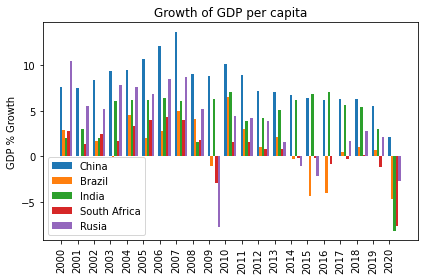

In [5]:
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, chn_gdp, width, label='China')
rects2 = ax.bar(x + .15, bra_gdp, width, label='Brazil')
rects3 = ax.bar(x + .30, ind_gdp, width, label='India')
rects4 = ax.bar(x + .45, zaf_gdp, width, label='South Africa')
rects5 = ax.bar(x + .60, rus_gdp, width, label='Rusia')

ax.set_ylabel('GDP % Growth')
ax.set_title('Growth of GDP per capita')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)
fig.tight_layout()


### GNI: <span style="color:green">Evolution of GNI per capita growth (annual %)</span> 

Gross national income (GNI) is defined as gross domestic product, plus net receipts from abroad of compensation of employees, property income and net taxes less subsidies on production.
Looking this indicator we can see that until 2008 had a growth perspective. With the 2008 global crises we can see that this markets was affected as well having a discrepancy of the development of this indicador and the past decade.

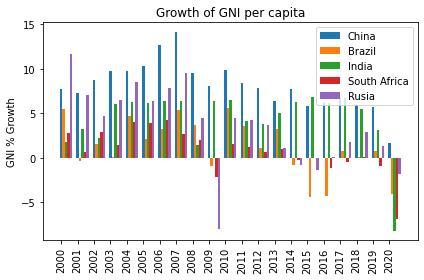

In [6]:
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

chn_gdi = df_ch["GNI per capita growth (annual %)"].unique()
bra_gdi = df_br["GNI per capita growth (annual %)"].unique()
ind_gdi = df_in["GNI per capita growth (annual %)"].unique()
zaf_gdi = df_za["GNI per capita growth (annual %)"].unique()
rus_gdi = df_ru["GNI per capita growth (annual %)"].unique()

fig, ax_gdi = plt.subplots()
rects1 = ax_gdi.bar(x, chn_gdi, width, label='China')
rects2 = ax_gdi.bar(x + .15, bra_gdi, width, label='Brazil')
rects3 = ax_gdi.bar(x + .30, ind_gdi, width, label='India')
rects4 = ax_gdi.bar(x + .45, zaf_gdi, width, label='South Africa')
rects5 = ax_gdi.bar(x + .60, rus_gdi, width, label='Rusia')

ax_gdi.set_ylabel('GNI % Growth')
ax_gdi.set_title('Growth of GNI per capita')
ax_gdi.set_xticks(x)
ax_gdi.set_xticklabels(labels)
ax_gdi.legend()

plt.xticks(rotation=90)
fig.tight_layout()


### Inflation: <span style="color:green">Evolution of Inflation, consumer prices (annual %)</span> 

Maybe one of the most important indicator is the Inflation that impact more the poor people affecting the quality of life for all people.
The country that call more attention to this indicator is Russia, where the Inflation indicator is the bigger of all of them and still growing more the mean. And we can see where China is different from the other countries been the only country that controled the inflation after the World crisis.

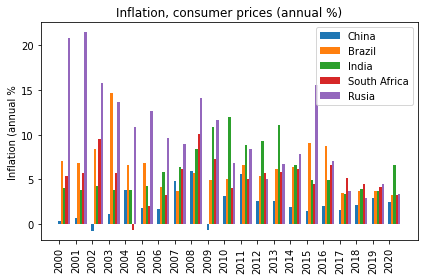

In [7]:
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

chn_inf = df_ch["Inflation, consumer prices (annual %)"].unique()
bra_inf = df_br["Inflation, consumer prices (annual %)"].unique()
ind_inf = df_in["Inflation, consumer prices (annual %)"].unique()
zaf_inf = df_za["Inflation, consumer prices (annual %)"].unique()
rus_inf = df_ru["Inflation, consumer prices (annual %)"].unique()

fig, ax_inf = plt.subplots()
rects1 = ax_inf.bar(x, chn_inf, width, label='China')
rects2 = ax_inf.bar(x + 0.15, bra_inf, width, label='Brazil')
rects3 = ax_inf.bar(x + 0.30, ind_inf, width, label='India')
rects4 = ax_inf.bar(x + 0.45, zaf_inf, width, label='South Africa')
rects5 = ax_inf.bar(x + 0.60, rus_inf, width, label='Rusia')

ax_inf.set_ylabel('Inflation (annual %')
ax_inf.set_title('Inflation, consumer prices (annual %)')
ax_inf.set_xticks(x)
ax_inf.set_xticklabels(labels)
ax_inf.legend()
plt.xticks(rotation=90)
fig.tight_layout()

### Relationship of the indicators: <span style="color:green">What is the relationship of the GDP and People using at least basic sanitation services, urban</span> 

The first of the sequence of graphics that will try to see the relationship between two indicators for the same country.
We can see that in the past years been increase the % of urban people with access to the basic sanitation services, while we can see the variation of the GDP, but don't exist correlation between the two variables.

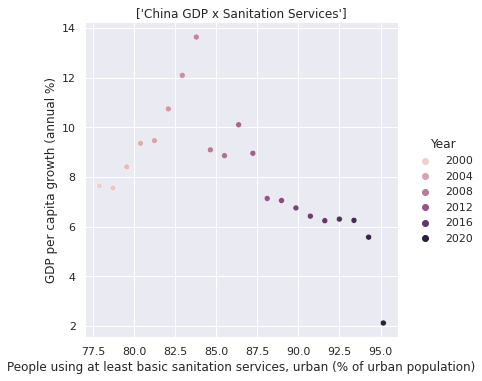

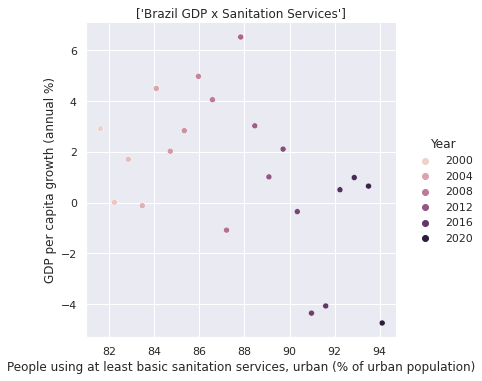

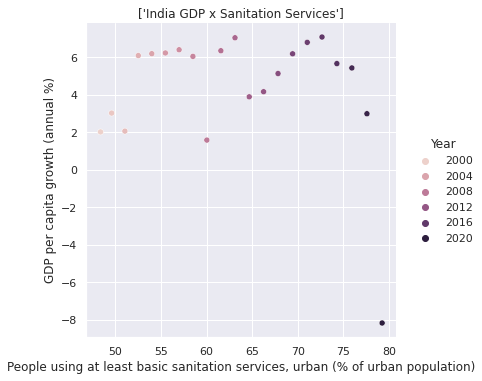

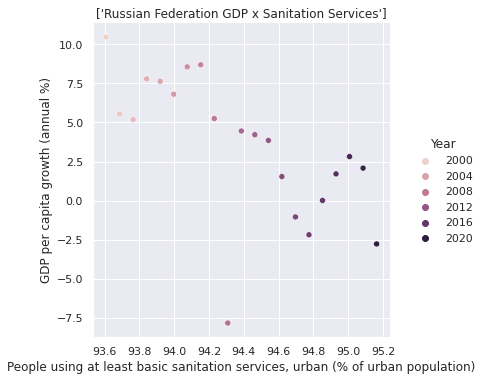

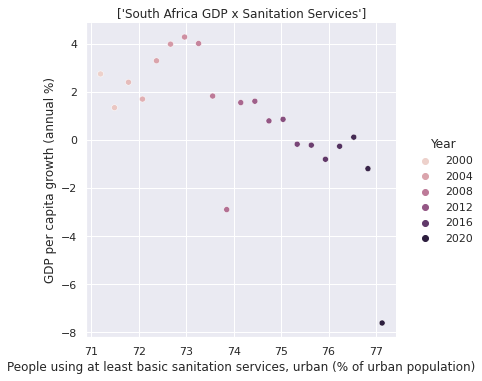

In [8]:
sns.set_theme(style="darkgrid")

data_leaks = [df_ch, df_br, df_in, df_ru, df_za]
countries = ["China", "Brazil", "India", "Rusia", "South Africa"]

for i in data_leaks:
    country_name = i["Country Name"].unique()
    g = sns.relplot(x="People using at least basic sanitation services, urban (% of urban population)",
            y="GDP per capita growth (annual %)", 
            data=i,
            kind="scatter", 
            hue="Year").set(title= country_name + " GDP x Sanitation Services")





### Relationship of the indicators: <span style="color:green">What is the relationship of the Inflation and Unemployment, total (% of total labor force) (national estimate)</span> 

The BRICS responds different when we create the relationship between Inflation x Unemployment. After the graphic was interisting to look for the covariance of this both indicators.

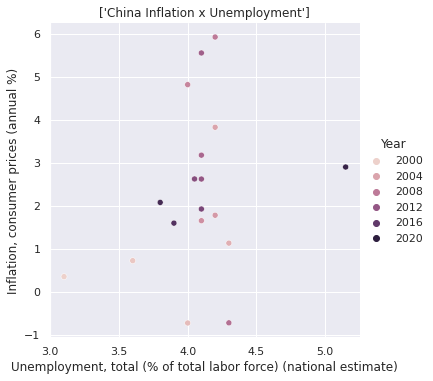

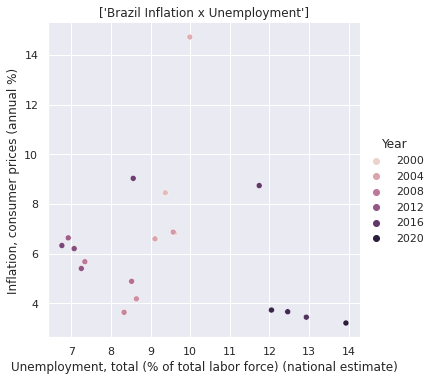

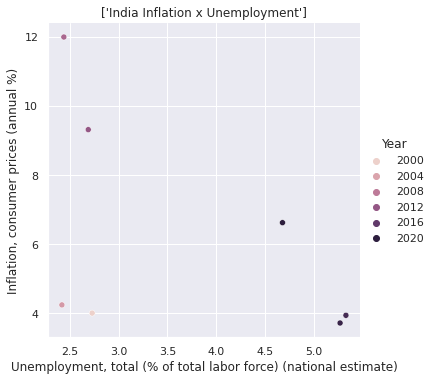

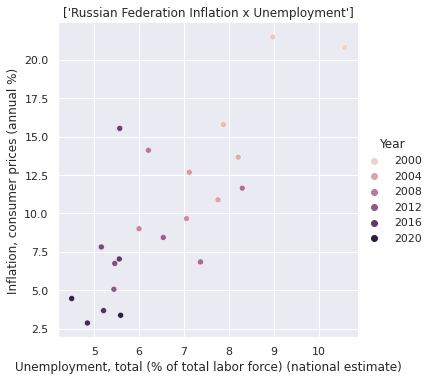

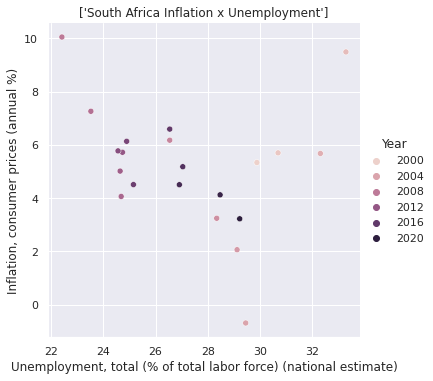

In [11]:
for i in data_leaks:
    country_name = i["Country Name"].unique()
    g = sns.relplot(x="Unemployment, total (% of total labor force) (national estimate)",
            y="Inflation, consumer prices (annual %)", 
            data=i,
            kind="scatter", 
            hue="Year").set(title= country_name + " Inflation x Unemployment")

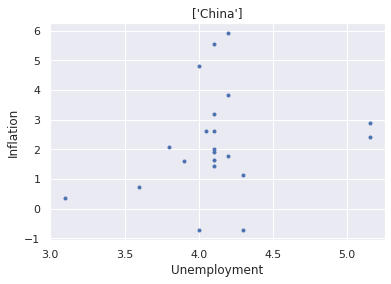

['China-> covariance_matrix: '] [[0.1851548  0.16985418]
 [0.16985418 3.09656376]]
['China-> inflation_cov :'] 0.16985417894412203
['China-> pearson_r: '] 0.22432038268028534


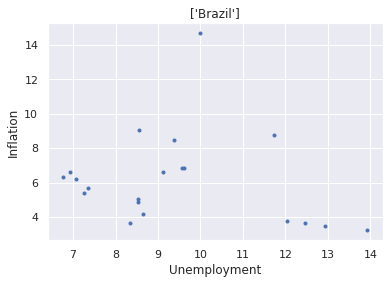

['Brazil-> covariance_matrix: '] [[       nan        nan]
 [       nan 6.87859322]]
['Brazil-> inflation_cov :'] nan
['Brazil-> pearson_r: '] nan


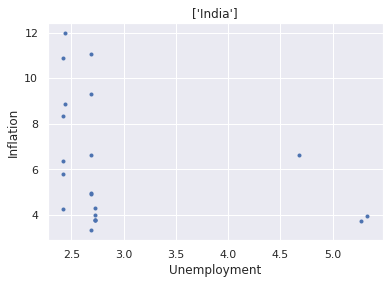

['India-> covariance_matrix: '] [[ 0.8305761  -0.77205634]
 [-0.77205634  7.67429193]]
['India-> inflation_cov :'] -0.7720563399741229
['India-> pearson_r: '] -0.30580185847843594


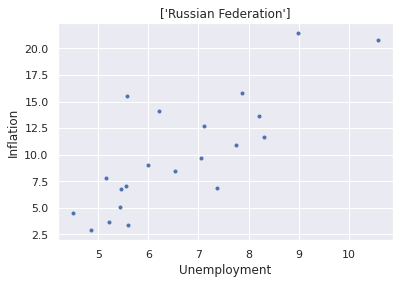

['Russian Federation-> covariance_matrix: '] [[ 2.44103563  6.73705723]
 [ 6.73705723 29.00534936]]
['Russian Federation-> inflation_cov :'] 6.737057230526614
['Russian Federation-> pearson_r: '] 0.8006526157271572


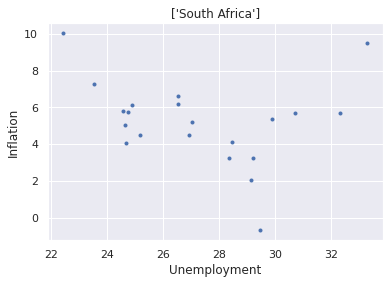

['South Africa-> covariance_matrix: '] [[ 8.56093642 -1.4291998 ]
 [-1.4291998   5.34489424]]
['South Africa-> inflation_cov :'] -1.4291998048082055
['South Africa-> pearson_r: '] -0.21128212411416084


In [30]:
for i in data_leaks:
    unemployment = i["Unemployment, total (% of total labor force) (national estimate)"].ffill()
    # print(unemployment.isna().sum())
    inflation = i["Inflation, consumer prices (annual %)"]
    #print(inflation.isna().sum())
    country_name = i["Country Name"].unique()
    plt.plot(unemployment, inflation, marker='.', linestyle='none')
    plt.title(country_name)
    plt.xlabel("Unemployment")
    plt.ylabel("Inflation")
    plt.show()
    covariance_matrix = np.cov(unemployment, inflation)
    # Print covariance matrix
    print(country_name + '-> covariance_matrix: ', covariance_matrix)
    # Extract covariance of length and width of inflation: petal_cov
    inflation_cov = covariance_matrix[0,1]
    # Print the length/width covariance
    print(country_name + '-> inflation_cov :', inflation_cov)
    # Compute Pearson correlation coefficient for I. versicolor
    r = pearson_r(unemployment, inflation)
    # Print the result
    print(country_name + '-> pearson_r: ', r)
    
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]




<b> About Pearson correlation coefficient, India is the only country that show us a direct correlation between Inflation x Unemployment. </b>


### Relationship: <span style="color:green">CO2 emission x Electric power consumption</span> 

While China, Brazil and India have a direct correlation in the increase of CO2 and Electric consumption in the past two decades, Sout Africa has less electricity in the recent years, while Russia show us a reduction in CO2 emission.

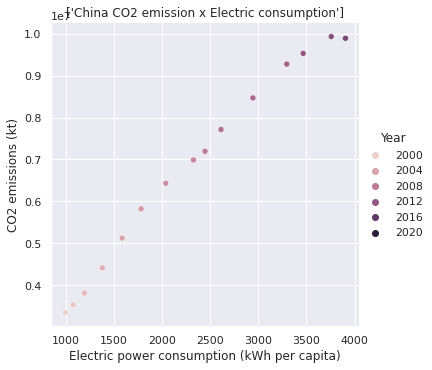

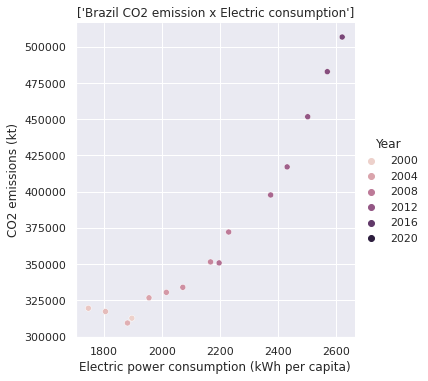

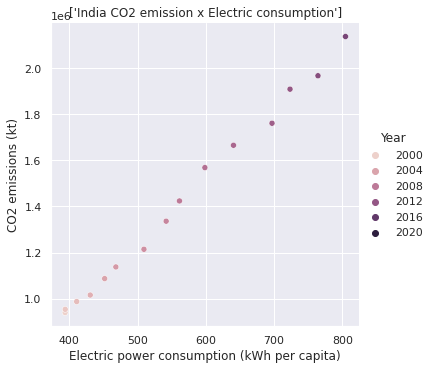

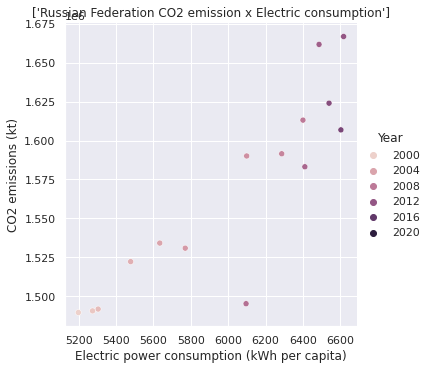

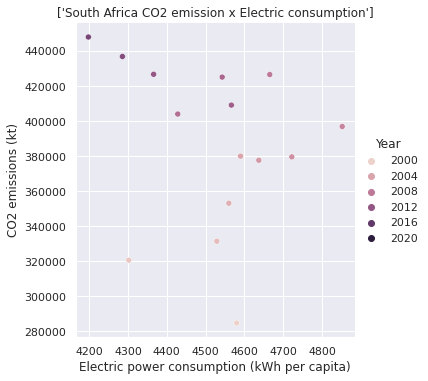

In [31]:
for i in data_leaks:
    country_name = i["Country Name"].unique()
    g = sns.relplot(x="Electric power consumption (kWh per capita)",
            y="CO2 emissions (kt)", 
            data=i,
            kind="scatter", 
            hue="Year").set(title= country_name + " CO2 emission x Electric consumption")

### Relationship: <span style="color:green">Inflation x Air transport, passengers carried</span> 

The years with the biggest inflation are the years with low number of passengers carried. Not exist a direct correlation, but as well the higher inflation will impact directly in the number of the passengers.

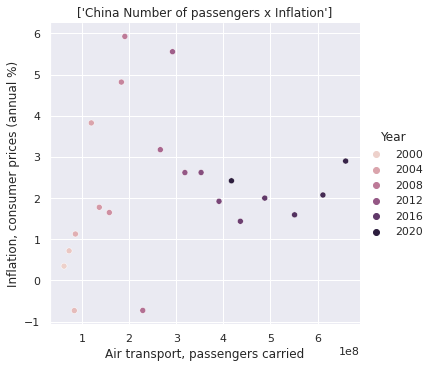

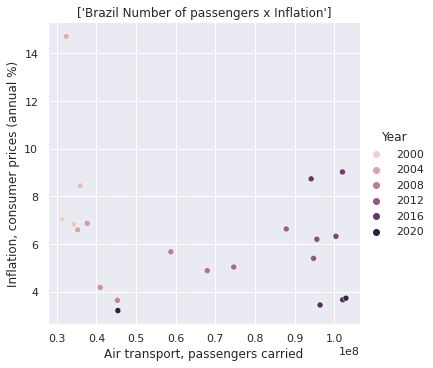

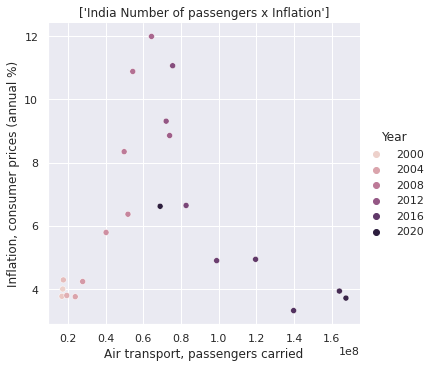

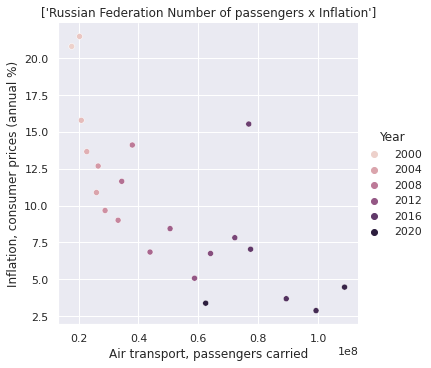

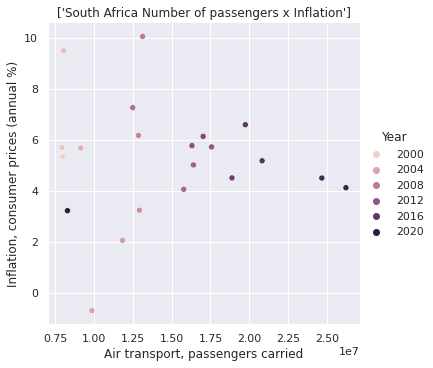

In [32]:
for i in data_leaks:
    country_name = i["Country Name"].unique()
    g = sns.relplot(x="Air transport, passengers carried",
            y="Inflation, consumer prices (annual %)", 
            data=i,
            kind="scatter", 
            hue="Year").set(title= country_name + " Number of passengers x Inflation")
